# Importar liberias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos


In [ ]:
columns=['NPEDIDO', 'NIT', 'NOMBRECLIENTE', 'CIUDAD', 'CodRef', 'ProductoEAN',
       'Descripcion', 'presentación', 'Cantidad', 'Precio Unitario',
       'SubTotal', 'Periodo', 'linea', 'FechaPedido', 'Canal', 'zona',
       'CantidadFactura', 'PrecioFactura', 'SubTotalFacturado']

In [ ]:
# Carga el archivo csv
df_2021 = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador 2023-2/Datos/2021.csv',on_bad_lines='skip',sep=';',names=columns)
df_2022 = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador 2023-2/Datos/2022.csv',on_bad_lines='skip',sep=';',names=columns)
df_2023 = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador 2023-2/Datos/2023.csv',on_bad_lines='skip',sep=';',names=columns)


In [ ]:
# Concatena los DataFrames en uno solo
df = pd.concat([df_2021, df_2022, df_2023], axis=0)

# Guarda el DataFrame resultante en un nuevo archivo CSV
df.to_csv('Datos2021-2023.csv')

print(f'El tamaño del dataset es: {df.shape}')

El tamaño del dataset es: (11676168, 19)


In [ ]:
# # Lee tus datos (asegúrate de tener una columna de fecha)
# df['FechaPedido'] = pd.to_datetime(df['FechaPedido'])
# df.set_index('FechaPedido', inplace=True)
# # # Organiza el DataFrame por la columna de fecha
# df = df.sort_values(by='FechaPedido')

# EDA


## Descartar columnas con valores no relevantes
Podemos eliminar algunas características/columnas que consideramos que no tiene gran influencia en la explicacion de la demnada



In [ ]:
df =  df.drop(columns = ['NPEDIDO', 'NIT',  'CodRef',
       'SubTotal', 'Periodo', 'SubTotalFacturado'])

## Estadísticas generales

In [ ]:
# Imprime las primeras cinco filas

df.head()

,NOMBRECLIENTE,CIUDAD,ProductoEAN,Descripcion,presentación,Cantidad,Precio Unitario,linea,FechaPedido,Canal,zona,CantidadFactura,PrecioFactura
0,AUDIFARMA S.A.,PEREIRA,7703038020172,Orocal D Tabletas,Caja x 300 tabl,3400,23000.0,Solidos,2021-06-10 00:00:00.000,Institucional,EJE CAFETERO,NaN,NaN
1,AUDIFARMA S.A.,PEREIRA,7703038066156,Hidroclorotiazida 25 mg Tabletas,Caja x 300 tabl (Minipack),44,5230.0,Solidos,2021-11-23 00:00:00.000,Institucional,EJE CAFETERO,NaN,NaN
2,AUDIFARMA S.A.,PEREIRA,7703038066224,Losartan Potasico 50 mg Tabletas Recubiertas,Caja x 300 tabl (Multipack),132,12000.0,Solidos,2021-11-23 00:00:00.000,Institucional,EJE CAFETERO,NaN,NaN
3,AUDIFARMA S.A.,PEREIRA,7703038065623,"Salbutamol 2 mg/5 mL (0,04%) Jarabe",Fco x 120 mL,210,1270.0,Liquidos,2021-12-03 00:00:00.000,Institucional,EJE CAFETERO,NaN,NaN
4,COHAN COOPERATIVA DE HOSPITALES DE ANTIOQUIA,MEDELLIN,7703038020172,Orocal D Tabletas,Caja x 300 tabl,2736,17700.0,Solidos,2021-01-14 00:00:00.000,Institucional,ANTIOQUIA,NaN,NaN


In [ ]:
# Tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11676168 entries, 0 to 3063171
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   NOMBRECLIENTE    object 
 1   CIUDAD           object 
 2   ProductoEAN      object 
 3   Descripcion      object 
 4   presentación     object 
 5   Cantidad         int64  
 6   Precio Unitario  float64
 7   linea            object 
 8   FechaPedido      object 
 9   Canal            object 
 10  zona             object 
 11  CantidadFactura  float64
 12  PrecioFactura    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ GB


In [ ]:
# Calcula estadísticas básicas para las columnas numéricas
df.describe()


,Cantidad,Precio Unitario,CantidadFactura,PrecioFactura
count,1.167617e+07,1.167617e+07,1.167038e+07,1.167038e+07
mean,4.415427e+02,2.043705e+04,2.472591e+02,2.149585e+04
std,2.256415e+03,2.379045e+04,8.521240e+02,2.424497e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,3.150000e+03,1.200000e+01,3.216000e+03
50%,4.800000e+01,1.015000e+04,4.800000e+01,1.160000e+04
75%,1.920000e+02,2.840000e+04,1.500000e+02,3.050000e+04
max,3.000000e+05,1.680000e+05,4.999200e+04,1.680000e+05


In [ ]:
print(df.columns)

Index(['NOMBRECLIENTE', 'CIUDAD', 'ProductoEAN', 'Descripcion', 'presentación',
       'Cantidad', 'Precio Unitario', 'linea', 'FechaPedido', 'Canal', 'zona',
       'CantidadFactura', 'PrecioFactura'],
      dtype='object')


In [ ]:
model_features = df.columns.drop('Cantidad')
model_target = 'Cantidad'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['NOMBRECLIENTE', 'CIUDAD', 'ProductoEAN', 'Descripcion', 'presentación',
       'Precio Unitario', 'linea', 'FechaPedido', 'Canal', 'zona',
       'CantidadFactura', 'PrecioFactura'],
      dtype='object')
Model target:  Cantidad


In [ ]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Precio Unitario', 'CantidadFactura', 'PrecioFactura'], dtype='object')

Categorical columns: Index(['NOMBRECLIENTE', 'CIUDAD', 'ProductoEAN', 'Descripcion', 'presentación',
       'linea', 'FechaPedido', 'Canal', 'zona'],
      dtype='object')


In [ ]:
# Analicemos la distribución de los valores de la columnas categoricas:
categorical_features_all.value_counts()

NOMBRECLIENTE    1
CIUDAD           1
ProductoEAN      1
Descripcion      1
presentación     1
linea            1
FechaPedido      1
Canal            1
zona             1
dtype: int64

## Estadística univariada: Gráficas básicas
En esta sección, se examinarán los datos con gráficas. Nota: Estas gráficas igonar valores faltantes o nulos.

Bar plots: Estas gráficas muestran conteos en variables categóricas. La función value_counts() calcula los conteos para cada valor único.

Primero, se calcula la distribución de la variable objetivo

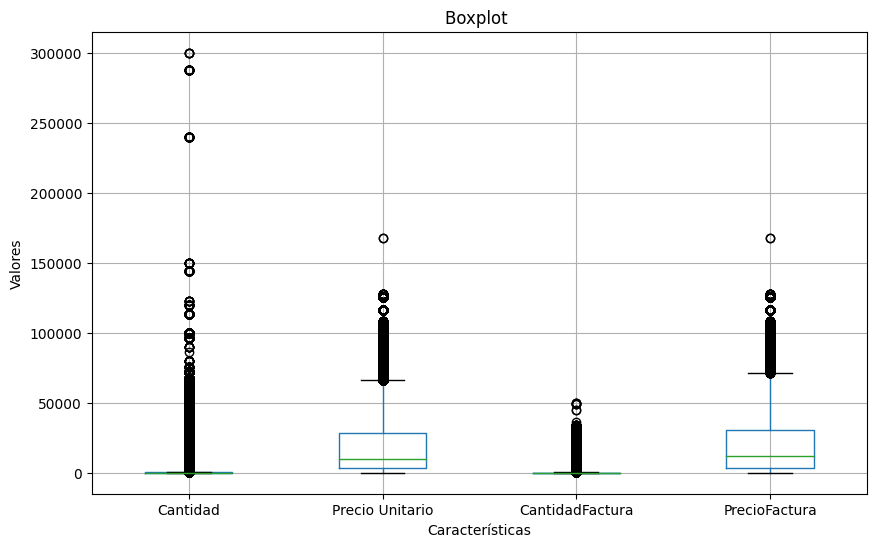

In [ ]:
# Crea un boxplot usando matplotlib
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot ')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

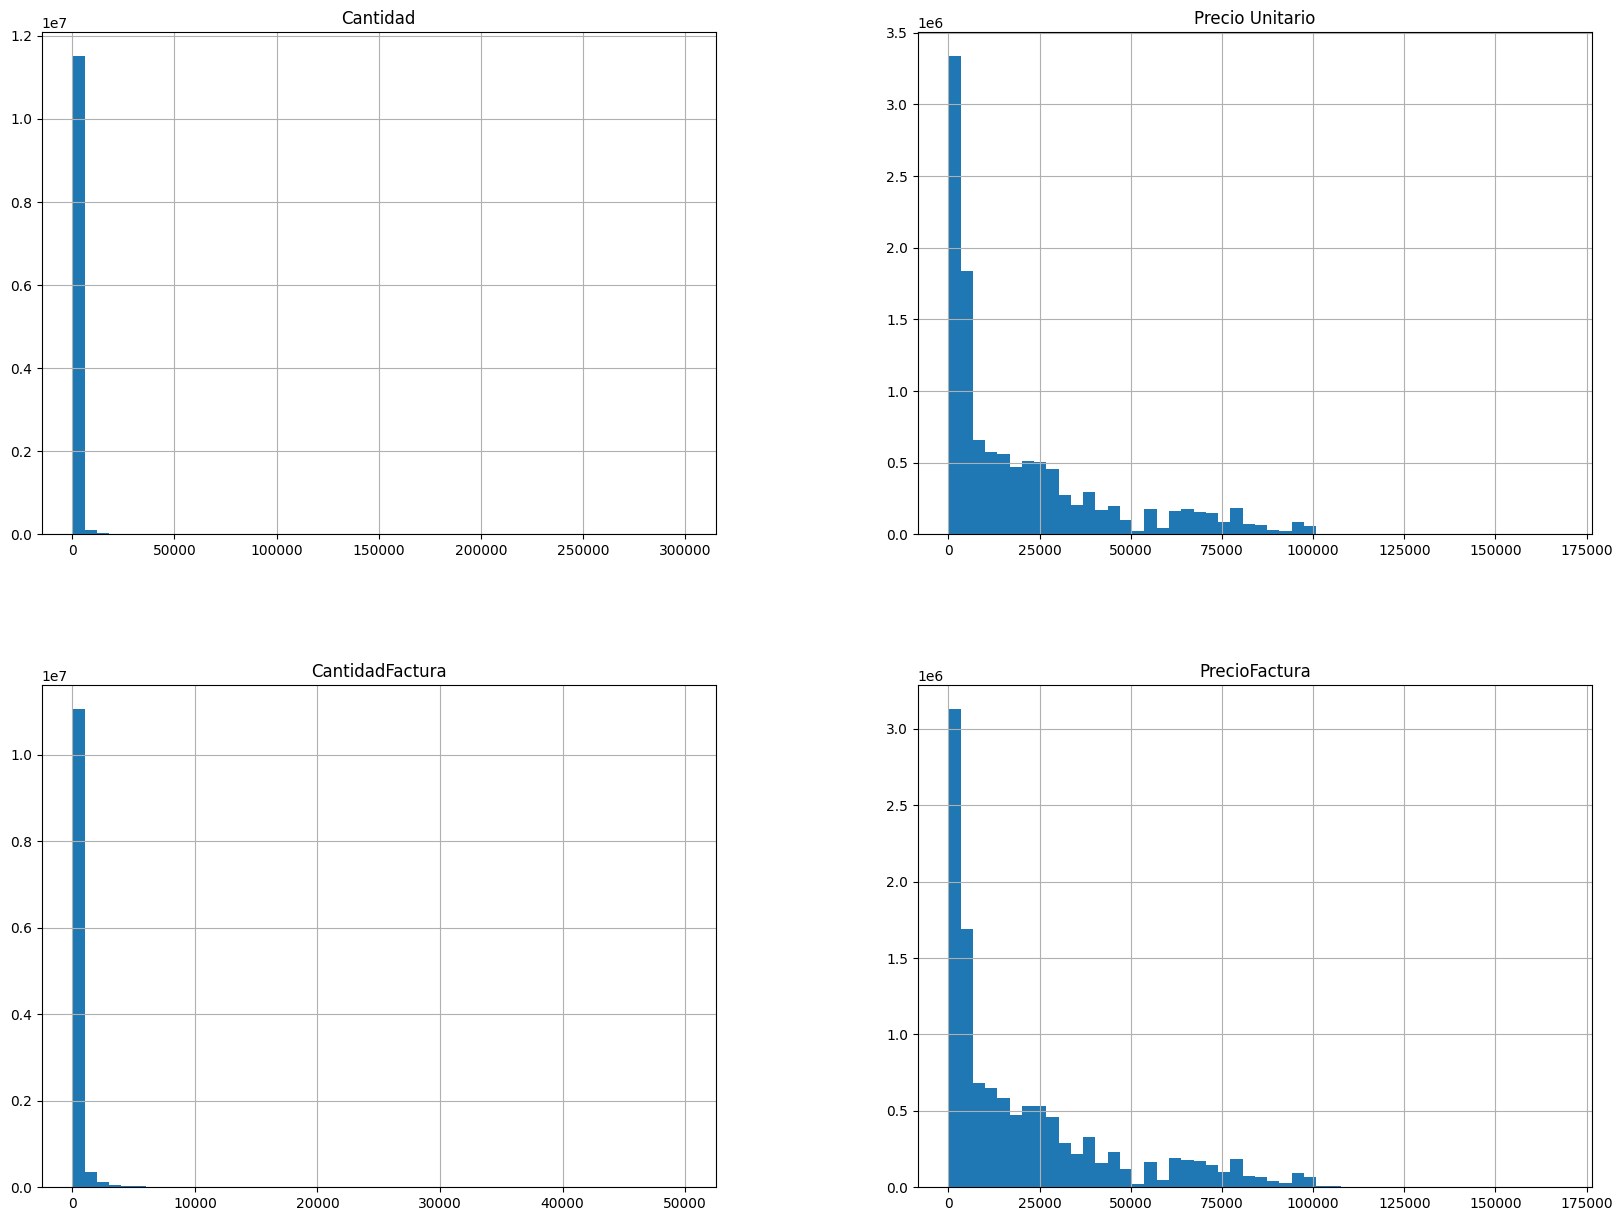

In [ ]:
df.hist(bins=50, figsize=(20, 15));

In [ ]:
df[model_target].value_counts()

12      880116
24      770080
6       498486
48      475824
72      390907
         ...  
1196         1
3484         1
4756         1
2987         1
4180         1
Name: Cantidad, Length: 3767, dtype: int64

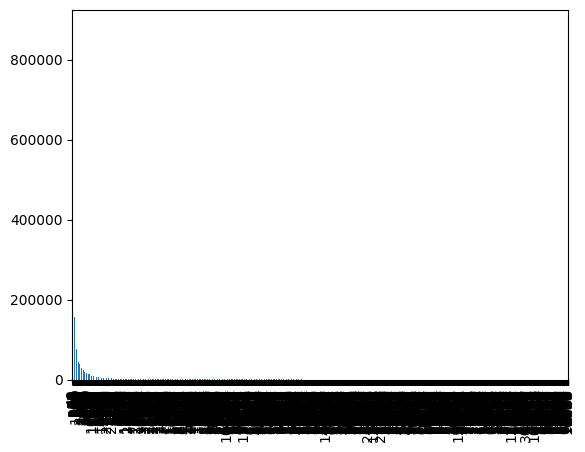

In [ ]:
df[model_target].value_counts().plot()
plt.show()

In [ ]:
for c in categorical_features_all:
  print(df[c].value_counts())

COOPERATIVA NACIONAL DE DROGUISTAS DETALLISTAS - COOPIDROGAS    2875667
UNION DE DROGUISTAS S.A. UNIDROGAS S.A.                          807441
ETICOS SERRANO GOMEZ LTDA.                                       783082
DISTRIBUIDORA FARMACEUTICA ROMA S.A.                             621672
COMERCIALIZADORA MULTIDROGAS DE COLOMBIA S.A.S                   483988
                                                                 ...   
DISTRIMEDIC  AD S.A.S                                                 4
HADER TEJADA DEL BARRE                                                3
FERRETERIA TORNILLOS Y ABRASIVOS S.A.S                                3
FUNDACION DESPERTAR JUVENIL                                           2
FARMACIAS EN RED S.A.S                                                2
Name: NOMBRECLIENTE, Length: 224, dtype: int64
MEDELLIN              1339352
BARRANQUILLA          1333306
BOGOTA                1310843
PEREIRA               1105603
CALI                   941364
           

linea


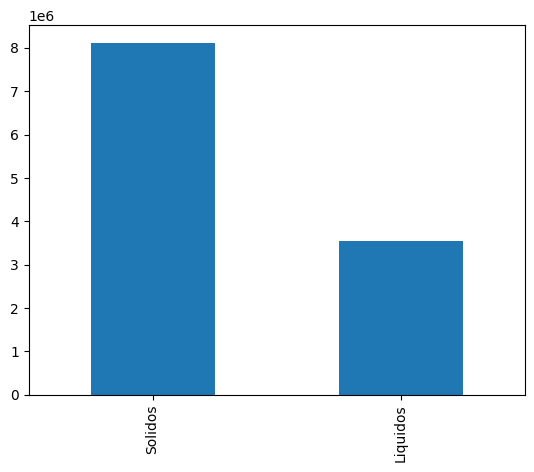

Canal


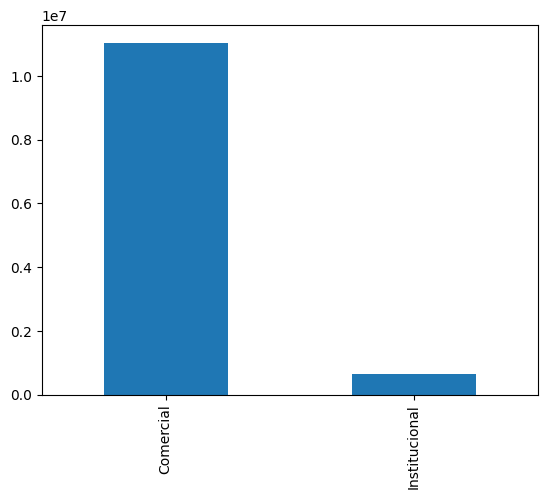

zona


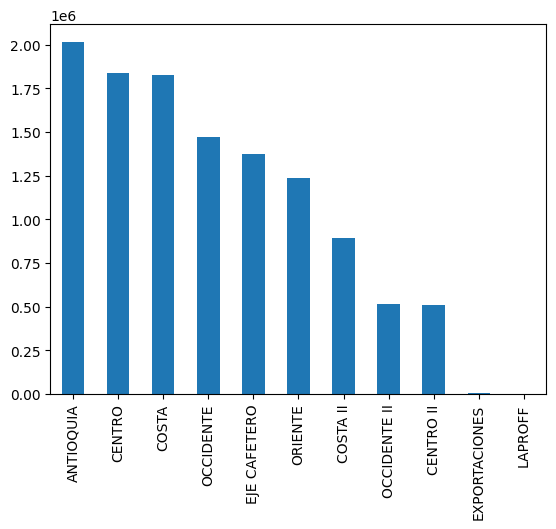

In [ ]:
for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

Precio Unitario


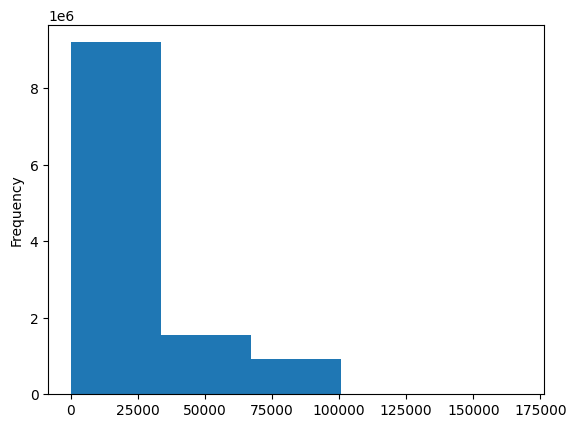

CantidadFactura


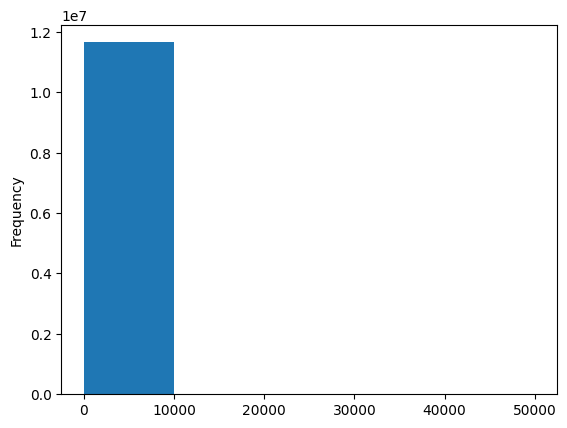

PrecioFactura


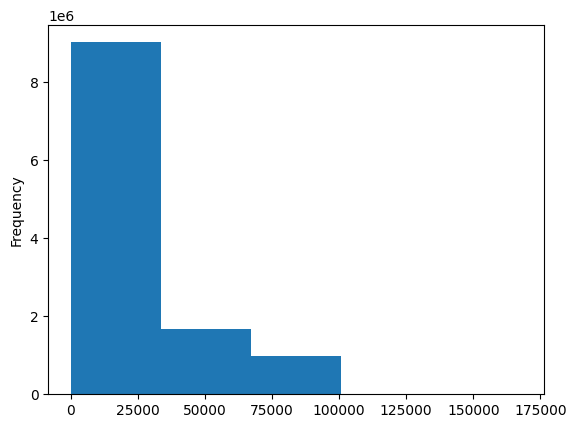

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [ ]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Precio Unitario
min: 0.0 max: 168000.0
CantidadFactura
min: 0.0 max: 49992.0
PrecioFactura
min: 0.0 max: 168000.0


In [ ]:
# # Drop values beyond 90% of max()

# for c in numerical_features_all:
#     # print(c)
#     dropIndexes = df[df[c] > df[c].max()*9/10].index
#     df.drop(dropIndexes , inplace=True)

In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Precio Unitario
(-168.001, 16800.0]     7012721
(16800.0, 33600.0]      2185352
(33600.0, 50400.0]       969024
(50400.0, 67200.0]       584544
(67200.0, 84000.0]       655297
(84000.0, 100800.0]      255650
(100800.0, 117600.0]      13350
(117600.0, 134400.0]        228
(134400.0, 151200.0]          0
(151200.0, 168000.0]          2
Name: Precio Unitario, dtype: int64
CantidadFactura
(-49.992999999999995, 4999.2]    11601135
(4999.2, 9998.4]                    51372
(9998.4, 14997.6]                   14033
(14997.6, 19996.8]                   1964
(19996.8, 24996.0]                   1108
(24996.0, 29995.2]                    477
(29995.2, 34994.4]                    284
(34994.4, 39993.6]                      1
(39993.6, 44992.8]                      0
(44992.8, 49992.0]                      8
Name: CantidadFactura, dtype: int64
PrecioFactura
(-168.001, 16800.0]     6766293
(16800.0, 33600.0]      2251408
(33600.0, 50400.0]      1061882
(50400.0, 67200.0]       606163
(67200.0, 8400

## Estadísticas multivariadas: Gráficas de dispersión y correlación

Scatter plot: Los gráficos de dispersión son gráficas en 2D de dos variables numéricas que puede ser utilizado para explorar su relación.



In [ ]:
# fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
# for i in range(0,len(numerical_features_all)):
#     for j in range(0,len(numerical_features_all)):
#         axes[i,j].scatter(x = train_df[numerical_features_all[i]], y = train_df[numerical_features_all[j]])
# fig.tight_layout()

Los diagramas de dispersión con identificación, a veces pueden ayudar a identificar si podemos lograr una buena separación entre los puntos de datos, basándonos únicamente en estas dos características numéricas.

Correlación: La correlación muestra un valor entre -1 y 1 que dice que tan linealmente relacionadas están las variables numéricas. Las correlaciones se pueden mostrar como una matrix o en un mapa de calo

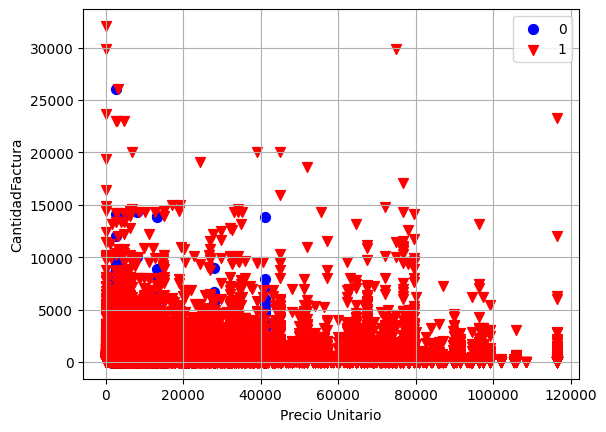

In [ ]:

X1 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 0]
X2 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 1]

plt.scatter(X1.iloc[:,0],
            X1.iloc[:,1],
            s=50,
            c='blue',
            marker='o',
            label='0')

plt.scatter(X2.iloc[:,0],
            X2.iloc[:,1],
            s=50,
            c='red',
            marker='v',
            label='1')

plt.xlabel(numerical_features_all[0])
plt.ylabel(numerical_features_all[1])
plt.legend()
plt.grid()
plt.show()

In [ ]:

cols=[numerical_features_all[0], numerical_features_all[1]]
#print(train_dff[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,Precio Unitario,CantidadFactura
Precio Unitario,1.000000,-0.006575
CantidadFactura,-0.006575,1.000000


<ipython-input-27-afb442b5d7ab>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

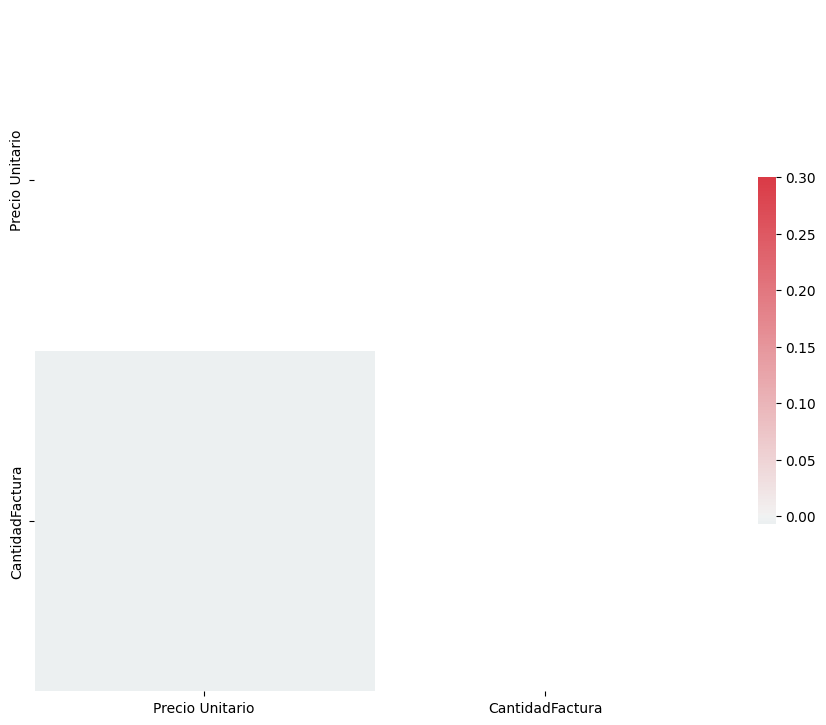

In [ ]:

cols=[numerical_features_all[0], numerical_features_all[1]]
corr = df[cols].corr()

# Genera una máscara para la triangular superior
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Inicializa la figura en matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Genera un mapa de colores personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Manejo de valores faltantes

In [ ]:
df.isna().sum()

NOMBRECLIENTE         0
CIUDAD                0
ProductoEAN           0
Descripcion           0
presentación          0
Cantidad              0
Precio Unitario       0
linea                 0
FechaPedido           0
Canal                 0
zona                  0
CantidadFactura    5786
PrecioFactura      5786
dtype: int64

### Llenar filas con valores faltantes
Aquí, simplemente se llenar las filas que tienen al na con valor cero, identificamos que estas filas son las variables numericas de los productos facturados es decir que hubo pedidos pero no se despacharon.

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

NOMBRECLIENTE      0
CIUDAD             0
ProductoEAN        0
Descripcion        0
presentación       0
Cantidad           0
Precio Unitario    0
linea              0
FechaPedido        0
Canal              0
zona               0
CantidadFactura    0
PrecioFactura      0
dtype: int64

In [ ]:
df.head()

,NOMBRECLIENTE,CIUDAD,ProductoEAN,Descripcion,presentación,Cantidad,Precio Unitario,linea,FechaPedido,Canal,zona,CantidadFactura,PrecioFactura
0,AUDIFARMA S.A.,PEREIRA,7703038020172,Orocal D Tabletas,Caja x 300 tabl,3400,23000.0,Solidos,2021-06-10 00:00:00.000,Institucional,EJE CAFETERO,0.0,0.0
1,AUDIFARMA S.A.,PEREIRA,7703038066156,Hidroclorotiazida 25 mg Tabletas,Caja x 300 tabl (Minipack),44,5230.0,Solidos,2021-11-23 00:00:00.000,Institucional,EJE CAFETERO,0.0,0.0
2,AUDIFARMA S.A.,PEREIRA,7703038066224,Losartan Potasico 50 mg Tabletas Recubiertas,Caja x 300 tabl (Multipack),132,12000.0,Solidos,2021-11-23 00:00:00.000,Institucional,EJE CAFETERO,0.0,0.0
3,AUDIFARMA S.A.,PEREIRA,7703038065623,"Salbutamol 2 mg/5 mL (0,04%) Jarabe",Fco x 120 mL,210,1270.0,Liquidos,2021-12-03 00:00:00.000,Institucional,EJE CAFETERO,0.0,0.0
4,COHAN COOPERATIVA DE HOSPITALES DE ANTIOQUIA,MEDELLIN,7703038020172,Orocal D Tabletas,Caja x 300 tabl,2736,17700.0,Solidos,2021-01-14 00:00:00.000,Institucional,ANTIOQUIA,0.0,0.0
